#DATA ANALISIS

###LATAR BELAKANG

Perusahaan xyz adalah sebuah perusaan yang saat ini berfokus pada penjualan shofware.

Kemudahan direktur marketing memberikan project kepada masing-masing divisi terkait dengan salah satu strategi untuk mengetahui penjualan, salah satu tugasnya adalah melakukan analisis data penjualan.

Oleh karena itu, salah satu data scientis dalam perusahaan ditugaskan untuk melakukan analisis mengenai data penjualan tersebut.



###RUMUSAN MASALAH

Berdasarkan data ini, perusahaan atau sebuah industri yang berfokus pada penjualan software ingin mengetahui apakah product mereka diminati oloh pasar dan perushaan ini ingin mengetahui sustain sales dan profit dari product atau industri yang mereka miliki.

###Importing Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Membaca File

In [2]:
df=pd.read_csv('SaaS-Sales.csv')

###Melihat Sample Data

In [3]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


###Melihat tipe tipe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

###Merubah Tipe Data

Perubahan **Order Date** yang sebelumnya Object Menjadi Date Format

Perubahan **Date Key** yang sebelumnya Object Menjadi Date Format

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date Key'] = pd.to_datetime(df['Date Key'], format='%Y%m%d')  # Use the appropriate format if needed

###Melihat Ulang Tipe Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   datetime64[ns]
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

###Pengecekan jika ada null dalam data

In [7]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###Pengecekan total row sebelum pengecekan duplikat

In [8]:
df.shape[0]

9994

###Menghapus Duplikat jika ada

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape[0]

9994

###Pengecekan Outliers

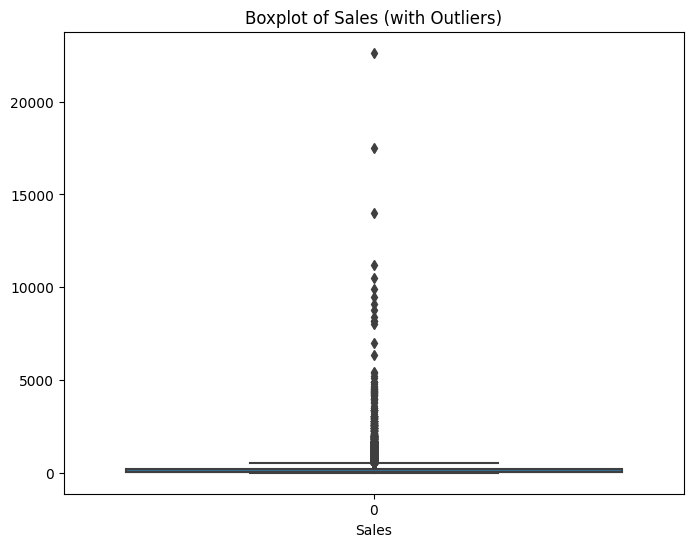

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Sales'])
plt.title('Boxplot of Sales (with Outliers)')
plt.xlabel('Sales')
plt.show()


###Menentukan Q1 dan Q3 untuk menghapus Outliers

In [12]:
# Calculate the IQR for 'Sales'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")


Q1 = 17.28
Q3 = 209.94
IQR = 192.66


In [13]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
df['Outlier'] = ((df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)).astype(int)
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Outlier
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,1
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,1
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,0


In [15]:
print(f"Total Rows Include Outliers = {df.shape[0]}")

Total Rows Include Outliers = 9994


###Membuang Outlier pada Data

In [16]:
clean_df = df[df['Outlier'] == 0]
print(f"Total Rows Exclude Outliers = {clean_df.shape[0]}")

Total Rows Exclude Outliers = 8827


###Export Clean Data ke csv untuk di analisis lebih lanjut

In [17]:
clean_df.to_csv('Clean-SaaS-Sales.csv', index=False)

#Analysis

##**Sales Statistic**:

**Count**: 8,827 transactions were recorded.

**Mean Sales**: $92.86, with a wide range of sales values.

**Minimum Sales**: $0.44, indicating some transactions with minimal sales.

**25th Percentile (Q1)**: $15.01, suggesting that 25% of transactions have sales below this value.

**Median (50th Percentile)**: $40.88, representing the middle point of the sales distribution.

**75th Percentile (Q3)**: $124.23, indicating that 75% of transactions have sales below this value.

**Maximum Sales**: $498.26, the highest recorded sales value.

##**Insight**:


*   The sales data has a diverse distribution, ranging from small transactions to a maximum of $498.26.

*   FinanceHub has the highest recorded sales, reaching $498.26, with a corresponding profit of $134.53.

*   ContactMatcher and Data Smasher are also among the top products in terms of both sales and profit.

*   Marketing Suite - Gold appears twice in the top 5, showcasing its consistent high performance.

*   Monitoring and understanding the sales and profitability of these top products can provide insights into successful product lines.

*   Further analysis could focus on the time trends, customer segments, and regions associated with these top-performing products to inform strategic business decisions.












In [18]:
# Display basic statistics of the 'Sales' column
print("Sales Statistics:")
clean_df['Sales'].describe()

Sales Statistics:


count    8827.000000
mean       92.864853
std       114.045078
min         0.444000
25%        15.008000
50%        40.880000
75%       124.225000
max       498.260000
Name: Sales, dtype: float64

In [19]:
# Identify transactions with the highest sales
top_sales_transactions = clean_df.nlargest(5, 'Sales')

# Display details of transactions with the highest sales
print("\nTop 5 Sales Transactions:")
top_sales_transactions[['Order ID', 'Product', 'Sales', 'Profit']]



Top 5 Sales Transactions:


,Order ID,Product,Sales,Profit
5219,AMER-2023-145653,FinanceHub,498.26,134.5302
8338,EMEA-2020-153087,Data Smasher,498.00,184.2600
7557,APJ-2023-159506,ContactMatcher,497.94,224.0730
1774,APJ-2020-118976,Marketing Suite - Gold,497.61,129.3786
8532,AMER-2022-156748,Marketing Suite - Gold,496.86,24.8430


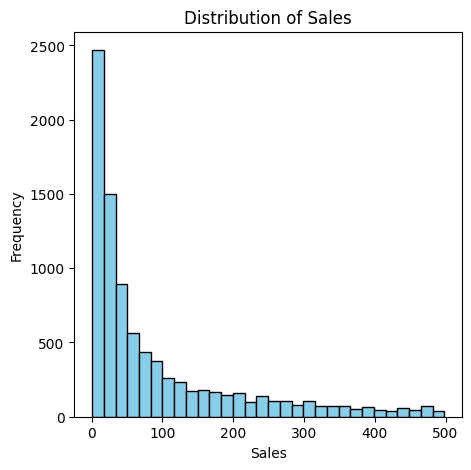

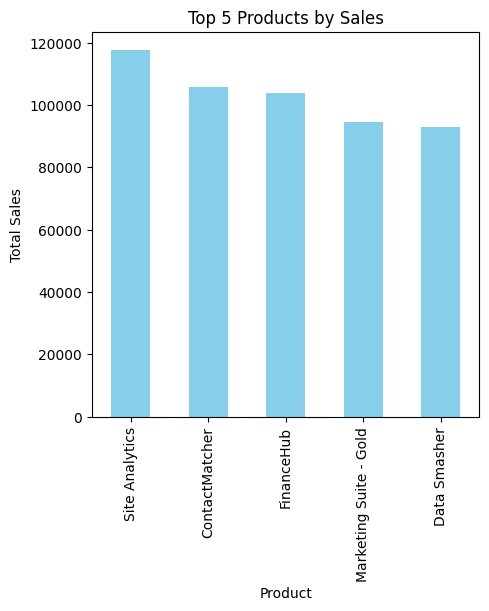

In [29]:
# Visualize the distribution of sales
plt.figure(figsize=(5, 5))
plt.hist(clean_df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Visualize top products by sales
top_products_by_sales = clean_df.groupby('Product')['Sales'].sum().nlargest(5)
plt.figure(figsize=(5, 5))
top_products_by_sales.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

In [21]:
# Sort DataFrame by 'Order Date'
clean_df_sorted = clean_df.sort_values(by='Date Key')

In [22]:
# Extract year and month for further analysis
clean_df_sorted['Year_Month'] = clean_df_sorted['Date Key'].dt.strftime('%Y-%b')


##**Sales trends over time analysis**

**Positive Sales Growth:**

The sales data reveals a consistent and positive growth trend from April 2020 to December 2023.

**Seasonal Peaks:**

December consistently stands out as a peak sales month, indicating strong performance likely influenced by holiday-related spending.

**Monthly Variability:**

Monthly sales exhibit variability, suggesting the influence of factors like promotions, marketing initiatives, or external conditions on sales performance.

**Yearly Peaks:**

Sales peaks in August, November, and July across multiple years, indicating potential seasonal patterns or strategic business initiatives during these periods.

**2023 Promising Performance:**

The data for 2023 shows robust sales growth, with particular strength in December, September, and August.

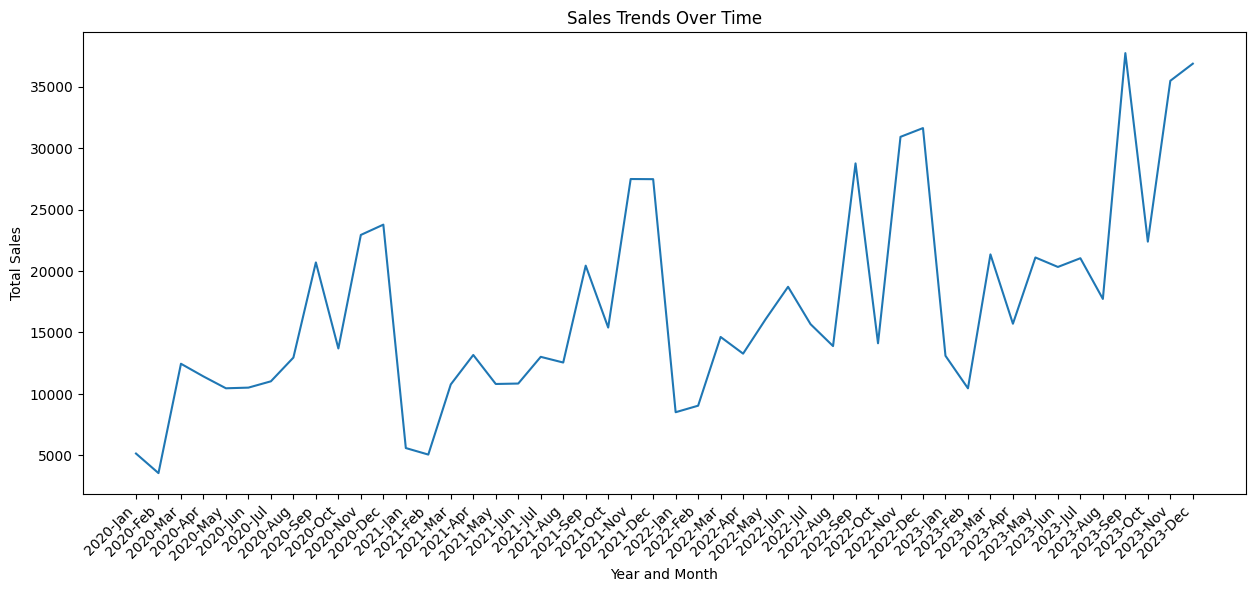

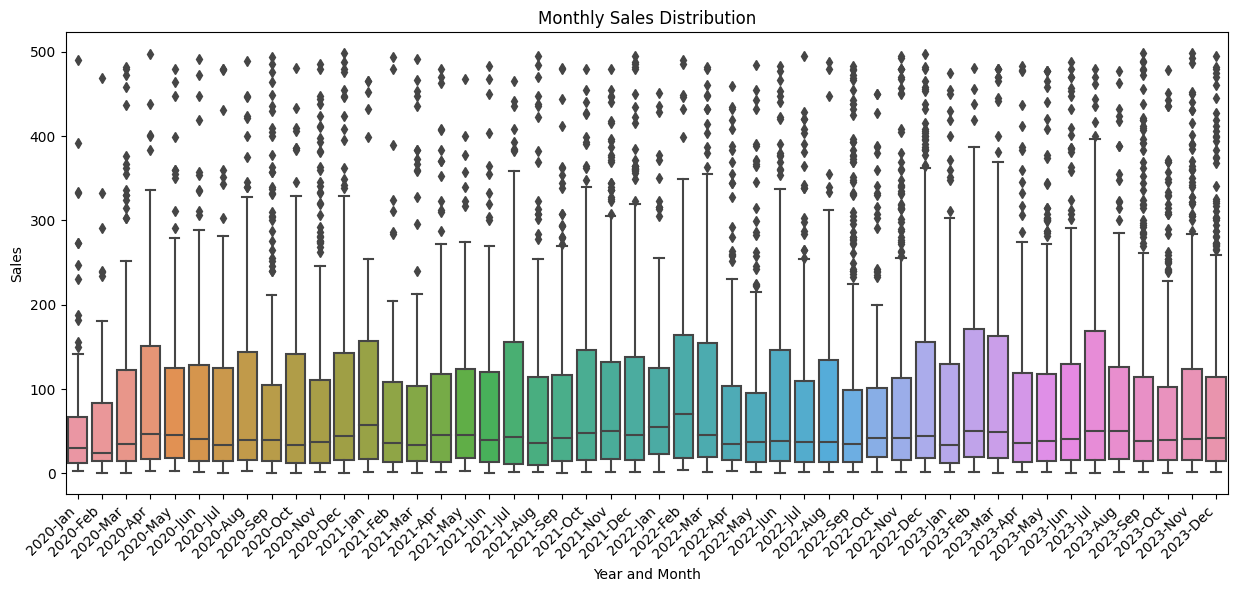

In [23]:
# Visualize sales trends over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year_Month', y='Sales', data=clean_df_sorted, estimator='sum', ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Visualize monthly sales distribution
plt.figure(figsize=(15, 6))
sns.boxplot(x='Year_Month', y='Sales', data=clean_df_sorted)
plt.title('Monthly Sales Distribution')
plt.xlabel('Year and Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


##**Customer Segment Analysis**
*   List item
*   List item

**Top Industries by Sales:**
*   The Finance industry leads in total sales, generating the highest revenue among the listed industries.
*   Energy and Tech follow closely, contributing significantly to overall sales.

**Potential Growth Opportunities:**
*   Industries such as Finance, Energy, and Tech show high sales figures, indicating robust performance.
*   Consider focusing marketing and sales efforts on these high-performing industries for continued growth.


**Diverse Customer Base:**
*   The dataset encompasses a diverse range of industries, reflecting a varied customer base.
*   Understanding the unique needs and preferences of customers in each industry can guide tailored marketing strategies.

**Industry-specific Strategies:**
*   Tailor marketing and sales strategies to address the specific challenges and opportunities within each industry.
*   Consider industry-specific promotions, product offerings, or partnerships to maximize effectiveness.

**Opportunities for Expansion:**
*   Identify industries with lower sales that may present opportunities for expansion or targeted marketing efforts.
*   Explore ways to penetrate new markets or strengthen presence in existing ones.

**Strategic Decision-making:**
*   Industry segmentation provides valuable insights for strategic decision-making in areas such as resource allocation, product development, and customer engagement.

**Competitive Landscape:**
*   Monitor competitors within each industry to benchmark performance and identify areas for differentiation.
*   Analyze factors contributing to the success of top-performing industries for potential implementation in other sectors.

**Long-term Sustainability:**
*   Evaluate the long-term sustainability and growth potential of each industry.
Anticipate industry trends and adapt strategies accordingly to stay ahead of market changes.

**Customer Relationship Management:**
*   Implement customer relationship management strategies tailored to the unique characteristics of each industry.
*   Foster strong relationships to enhance customer retention and loyalty.

**Continuous Monitoring:**
*   Regularly monitor industry trends, customer feedback, and market dynamics to adapt strategies and remain agile in a dynamic business environment.




In [24]:
# Customer Segmentation based on Industry
industry_segmentation = clean_df.groupby('Industry')['Sales'].sum().sort_values(ascending=False).reset_index()

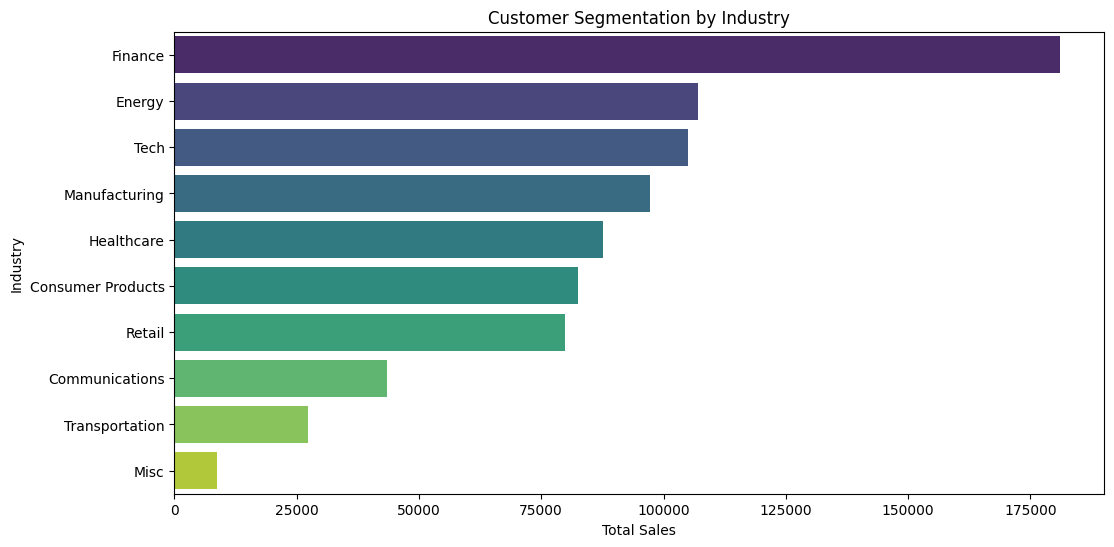

In [25]:
# Visualize Industry Segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Industry', data=industry_segmentation, palette='viridis')
plt.title('Customer Segmentation by Industry')
plt.xlabel('Total Sales')
plt.ylabel('Industry')
plt.show()


In [26]:
# Customer Segmentation based on Region
region_segmentation = clean_df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()


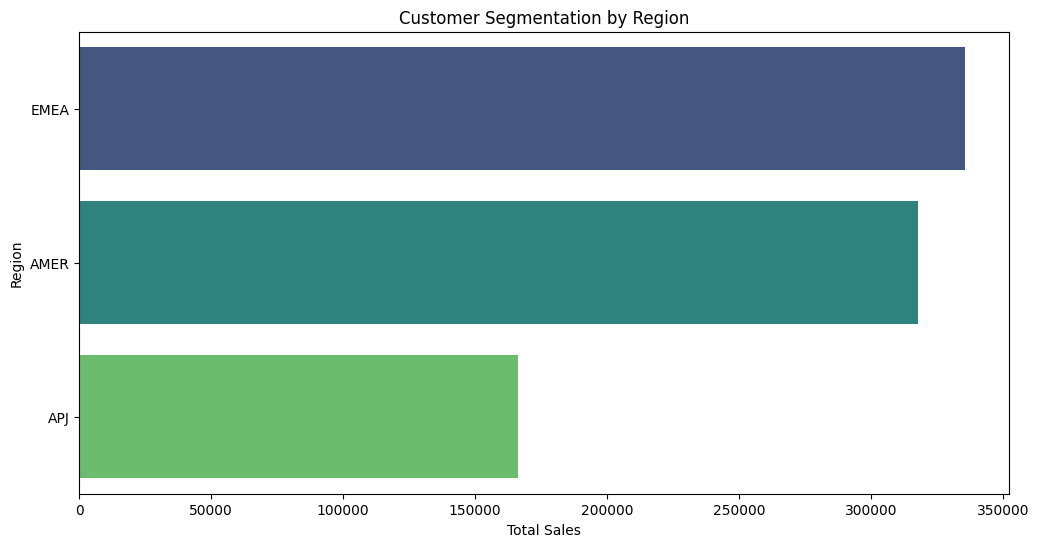

In [27]:
# Visualize Region Segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Region', data=region_segmentation, palette='viridis')
plt.title('Customer Segmentation by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

##Correlation Analysis


*   There is a positive correlation between Sales and Quantity, suggesting that higher sales are associated with higher quantities sold.
*   The correlation between Sales and Discount is weakly negative, indicating a slight decrease in sales as discounts increase.
*   Sales and Profit show a positive correlation, suggesting that higher sales are associated with higher profits.
*   There is a moderate negative correlation between Discount and Profit, indicating that higher discounts are associated with lower profits.




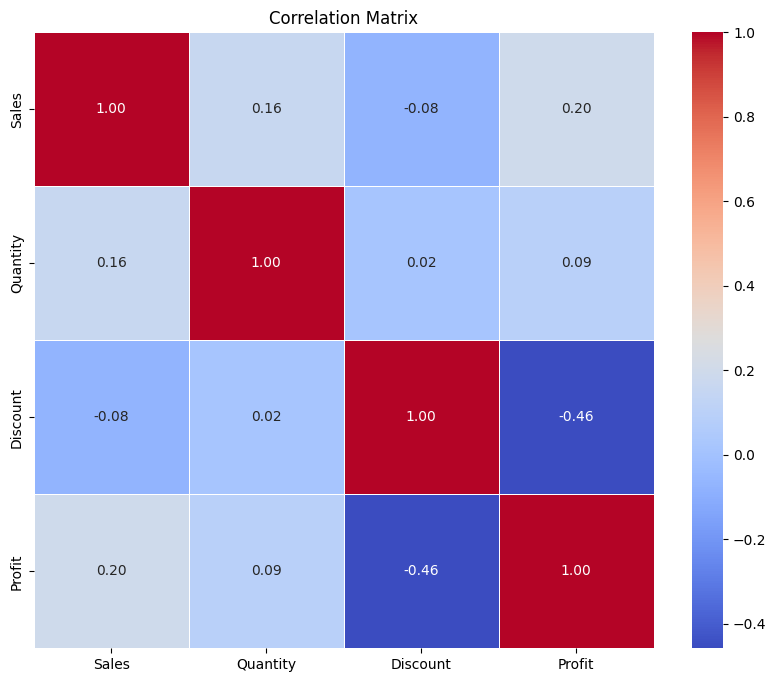

In [30]:
# Select relevant numerical columns for correlation analysis
numerical_columns = clean_df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Conclusion

The in-depth analysis of sales data unveils consistent positive growth trends from April 2020 to December 2023, with notable peaks in December, suggesting strong holiday-related sales. Monthly variability indicates the influence of factors like promotions, marketing initiatives, and external conditions. The promising performance in 2023, particularly in December, September, and August, signals potential strategic success.

The customer segmentation analysis highlights Finance as the leading industry in total sales, closely followed by Energy and Tech. Opportunities for growth lie in tailoring marketing efforts to high-performing industries and addressing industry-specific challenges. The correlation analysis underscores the importance of balancing discounts to maintain profitability and leveraging positive correlations between sales, quantity, and profit. Strategic recommendations include capitalizing on seasonal peaks, focusing on high-performing industries, and adapting strategies for long-term sustainability in a dynamic market landscape.